In [157]:
import requests
import numpy as np

def get_data(wav_file, port=8000):
    with open(wav_file, 'rb') as f:
        response = requests.post('http://192.168.10.220:' + str(port) + '/wav_to_lips',
                                 files={'file': f},
                                 params={'center_value': 0.4,
                                         'expansion_value': 10,
                                         'max_value': 1.0,
                                         'o_center_value': 0.2,
                                         'o_expansion_value': 5,
                                         'o_max_value': 1.0
                                        }
                                )
    data = np.array(response.json())
    print(data.shape)
    
    wav, _ = librosa.load(wav_file, sr=24000, res_type='polyphase')
    mel = librosa.feature.melspectrogram(y=wav, sr=24000, n_fft=2048, hop_length=800, win_length=2048)
    mel = np.log10(mel + 1e-5).T

    return data, mel

def get_data2(wav_file, port=8001):
    with open(wav_file, 'rb') as f:
        response = requests.post('http://192.168.10.220:' + str(port) + '/wav_to_lips',
                                 files={'file': f},
                                 params={'sid': 1,           # 1, 2, 3, 4, 5, 6, 7 : Speaker ID
                                         'temperature': 0.1, # 0.0-1.0 : Temperature
                                        }
                                )
    data = np.array(response.json())
    print(data.shape)
    
    wav, _ = librosa.load(wav_file, sr=24000, res_type='polyphase')
    mel = librosa.feature.melspectrogram(y=wav, sr=24000, n_fft=2048, hop_length=800, win_length=2048)
    mel = np.log10(mel + 1e-5).T

    return data, mel

def get_data3(wav_file, port=8004):
    with open(wav_file, 'rb') as f:
        response = requests.post('http://192.168.10.220:' + str(port) + '/wav_to_lips',
                                 files={'file': f},
                                 params={'axis1': 0.0,
                                         'axis2': 0.0,
                                        }
                                )
    data = np.array(response.json())
    print(data.shape)
    
    wav, _ = librosa.load(wav_file, sr=24000, res_type='polyphase')
    mel = librosa.feature.melspectrogram(y=wav, sr=24000, n_fft=2048, hop_length=800, win_length=2048)
    mel = np.log10(mel + 1e-5).T

    return data, mel

def get_data4(wav_file, port=8004):
    with open(wav_file, 'rb') as f:
        data = {'cr': [[0.5, 1], [0.5, 1], [0.5, 1], [0.5, 1], [0.5, 1],
                      [0.5, 1], [0.5, 1], [0.5, 1], [0.5, 1], [0.5, 1],

                      [0.5, 1], [0.5, 1], [0.5, 1], [0.5, 1], [0.5, 1],
                      [0.5, 1], [0.5, 1], [0.5, 1], [0.5, 1], [0.5, 1],

                      [0.5, 1], [0.5, 1], [0.5, 1], [0.5, 1], [0.5, 1],
                      [0.5, 1], [0.5, 1], [0.5, 1], [0.5, 1], [0.5, 1],

                      [0.5, 1], [0.5, 1], [0.5, 1], [0.5, 1], [0.5, 1],
                      [0.5, 1], [0.5, 1], [0.5, 1], [0.5, 1], [0.5, 1],

                      [0.5, 1], [0.5, 1], [0.5, 1], [0.5, 1], [0.5, 1],
                      [0.5, 1], [0.5, 1], [0.5, 1], [0.5, 1], [0.5, 1],

                      [0.5, 1], [0.5, 1], [0.5, 1], [0.5, 1], [0.5, 1],
                      [0.5, 1], [0.5, 1], [0.5, 1], [0.5, 1], [0.5, 1],

                      [0.5, 1]]
                     }
        data = json.dumps(data)
        response = requests.post('http://192.168.10.220:' + str(port) + '/wav_to_lips',
                                 files={'file': f},
                                 params={"axis1": 0.0,
                                         "axis2": 0.0,
                                         "data": data
                                        }
                                )
    data = np.array(response.json())
    print(data.shape)
    
    wav, _ = librosa.load(wav_file, sr=24000, res_type='polyphase')
    mel = librosa.feature.melspectrogram(y=wav, sr=24000, n_fft=2048, hop_length=800, win_length=2048)
    mel = np.log10(mel + 1e-5).T

    return data, mel

(397, 61)


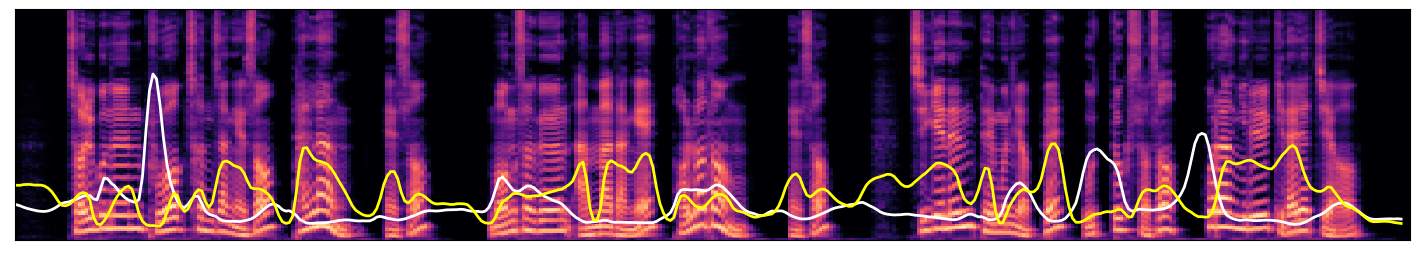

In [158]:
import librosa.display
import matplotlib.pyplot as plt
import librosa

wav_file = '/Storage/speech/tts/kaist-audio-book/wav/남1_동화1/1181.wav'
#wav_file = '/Storage/speech/tts/kaist-audio-book/wav/여1_동화1/1181.wav'

data2, mel2 = get_data3(wav_file, port=8002)

# plt.figure(figsize=[18, 3])
# librosa.display.specshow(data2.T, cmap='magma')
# plt.show()

plt.figure(figsize=[18, 3])
librosa.display.specshow(mel2.T, cmap='magma')
plt.plot(data2[:, 20] * 128, color='white', linewidth=2)
plt.plot(data2[:, 37] * 128, color='yellow', linewidth=2)


(397, 61)


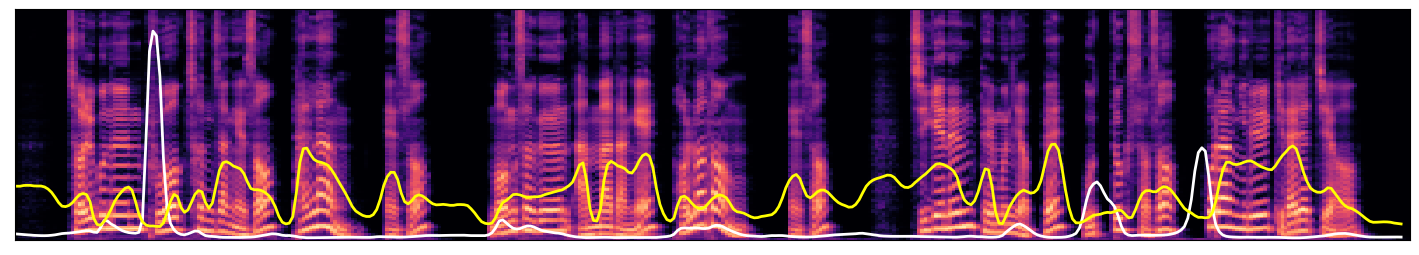

In [159]:
import librosa.display
import matplotlib.pyplot as plt
import librosa

wav_file = '/Storage/speech/tts/kaist-audio-book/wav/남1_동화1/1181.wav'
#wav_file = '/Storage/speech/tts/kaist-audio-book/wav/여1_동화1/1181.wav'

data2, mel2 = get_data4(wav_file, port=8003)

plt.figure(figsize=[18, 3])
librosa.display.specshow(mel2.T, cmap='magma')
plt.plot(data2[:, 20] * 128, color='white', linewidth=2)
plt.plot(data2[:, 37] * 128, color='yellow', linewidth=2)
plt.show()

torch.Size([1, 61, 100])
(61, 2)


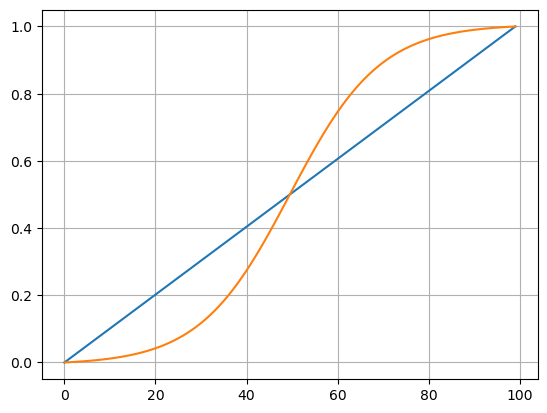

In [196]:
import torch
x = torch.linspace(0, 1, 100)
x = x.unsqueeze(0).repeat(61, 1).unsqueeze(0)
print(x.shape)

cr = np.array([[0.5, 10], [0.5, 1], [0.5, 1], [0.5, 1], [0.5, 1],
               [0.5, 1], [0.5, 1], [0.5, 1], [0.5, 1], [0.5, 1],
               
               [0.5, 1], [0.5, 1], [0.5, 1], [0.5, 1], [0.5, 1],
               [0.5, 1], [0.5, 1], [0.5, 1], [0.5, 1], [0.5, 1],
               
               [0.5, 1], [0.5, 1], [0.5, 1], [0.5, 1], [0.5, 1],
               [0.5, 1], [0.5, 1], [0.5, 1], [0.5, 1], [0.5, 1],
               
               [0.5, 1], [0.5, 1], [0.5, 1], [0.5, 1], [0.5, 1],
               [0.5, 1], [0.5, 1], [0.5, 1], [0.5, 1], [0.5, 1],
               
               [0.5, 1], [0.5, 1], [0.5, 1], [0.5, 1], [0.5, 1],
               [0.5, 1], [0.5, 1], [0.5, 1], [0.5, 1], [0.5, 1],
               
               [0.5, 1], [0.5, 1], [0.5, 1], [0.5, 1], [0.5, 1],
               [0.5, 1], [0.5, 1], [0.5, 1], [0.5, 1], [0.5, 1],
               
               [0.5, 1]
              ])
print(cr.shape)

c = torch.Tensor(cr[:, 0].reshape(1, 61, 1))
r = torch.Tensor(cr[:, 1].reshape(1, 61, 1))
f0 = 1 / (1 + np.exp(r*c))
f1 = 1 / (1 + np.exp(-r*(1-c)))
a = 1 / (f1 - f0)
b = -a * f0
y = a * torch.sigmoid(r*(x - c)) + b

plt.plot(x[0, 0])
plt.plot(y[0, 0])
plt.grid()
plt.show()

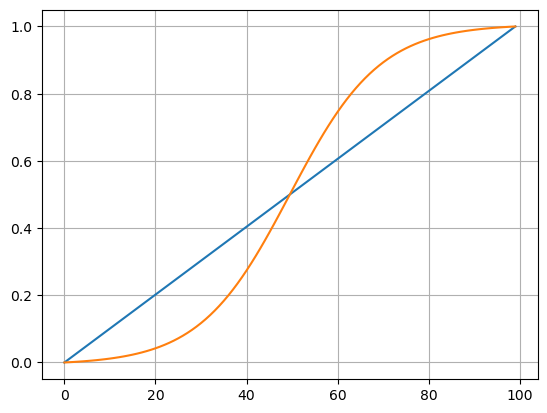

In [218]:
import numpy as np

def sigmoid(x):
    return 1 / (1+np.exp(-x))

# input
x = np.linspace(0, 1, 100)

# center
c = 0.5
# expansion ratio
r = 10

f0 = 1 / (1 + np.exp(r*c))
f1 = 1 / (1 + np.exp(-r*(1-c)))
a = 1 / (f1 - f0)
b = -a * f0

# output
y = a * sigmoid(r*(x - c)) + b

plt.plot(x)
plt.plot(y)
plt.grid()
plt.show()